# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [2]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

## Some helper functions
The following functions will generate data and polynomial values.

In [3]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [4]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [5]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     52.99
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           6.61e-07
Time:                        22:16:37   Log-Likelihood:                -48.289
No. Observations:                  20   AIC:                             98.58
Df Residuals:                      19   BIC:                             99.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.5881      0.493      7.279      0.0

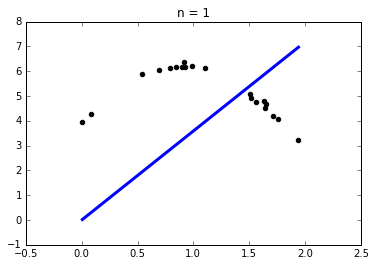

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     22.21
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           0.000152
Time:                        22:16:37   Log-Likelihood:                -53.868
No. Observations:                  20   AIC:                             109.7
Df Residuals:                      19   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9789      0.420      4.713      0.0

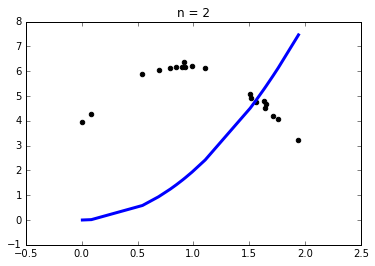

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     13.26
Date:                Thu, 04 Aug 2016   Prob (F-statistic):            0.00174
Time:                        22:16:37   Log-Likelihood:                -56.316
No. Observations:                  20   AIC:                             114.6
Df Residuals:                      19   BIC:                             115.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0397      0.286      3.642      0.0

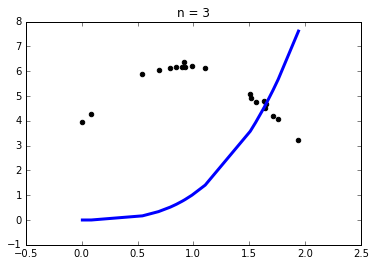

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     9.412
Date:                Thu, 04 Aug 2016   Prob (F-statistic):            0.00633
Time:                        22:16:38   Log-Likelihood:                -57.586
No. Observations:                  20   AIC:                             117.2
Df Residuals:                      19   BIC:                             118.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5436      0.177      3.068      0.0

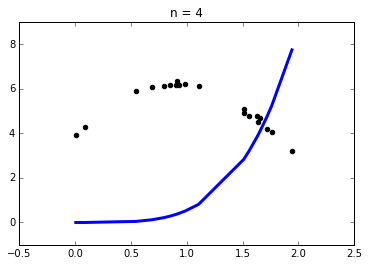

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     7.296
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0142
Time:                        22:16:38   Log-Likelihood:                -58.360
No. Observations:                  20   AIC:                             118.7
Df Residuals:                      19   BIC:                             119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2839      0.105      2.701      0.0

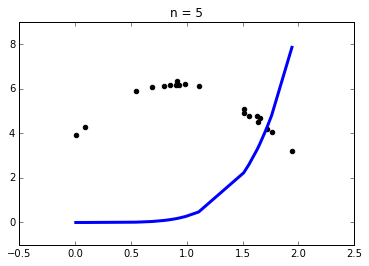

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5.905
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0252
Time:                        22:16:38   Log-Likelihood:                -58.904
No. Observations:                  20   AIC:                             119.8
Df Residuals:                      19   BIC:                             120.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1474      0.061      2.430      0.0

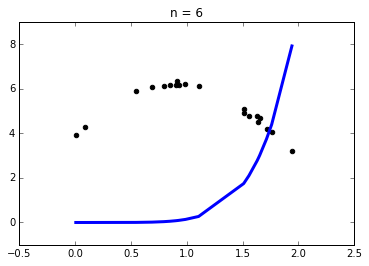

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     4.876
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0397
Time:                        22:16:38   Log-Likelihood:                -59.325
No. Observations:                  20   AIC:                             120.7
Df Residuals:                      19   BIC:                             121.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0757      0.034      2.208      0.0

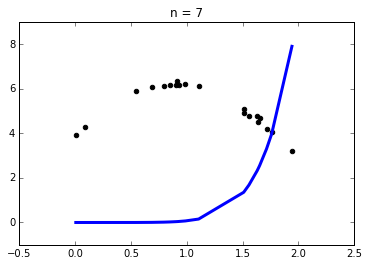

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.065
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0581
Time:                        22:16:38   Log-Likelihood:                -59.671
No. Observations:                  20   AIC:                             121.3
Df Residuals:                      19   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0384      0.019      2.016      0.0

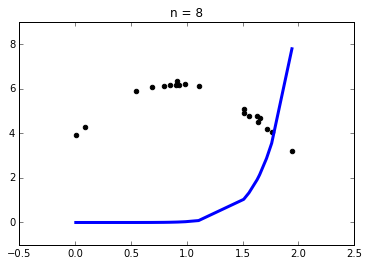

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.406
Date:                Thu, 04 Aug 2016   Prob (F-statistic):             0.0806
Time:                        22:16:38   Log-Likelihood:                -59.961
No. Observations:                  20   AIC:                             121.9
Df Residuals:                      19   BIC:                             122.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0193      0.010      1.845      0.0

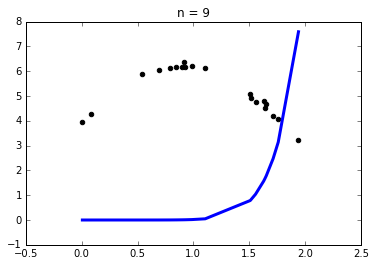

In [6]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

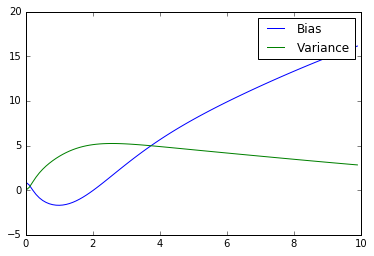

In [7]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     52.99
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           6.61e-07
Time:                        22:16:47   Log-Likelihood:                -48.289
No. Observations:                  20   AIC:                             98.58
Df Residuals:                      19   BIC:                             99.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.5881      0.493      7.279      0.0

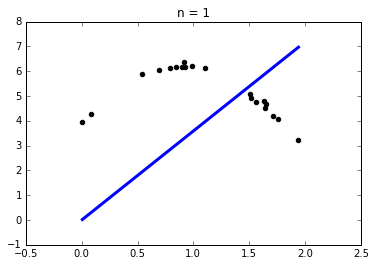

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     164.6
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.71e-12
Time:                        22:16:47   Log-Likelihood:                -32.017
No. Observations:                  20   AIC:                             68.03
Df Residuals:                      18   BIC:                             70.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            12.0364      1.010     11.919      0.0

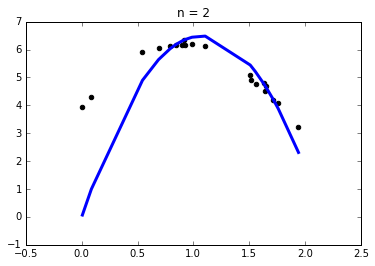

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           8.80e-12
Time:                        22:16:47   Log-Likelihood:                -30.234
No. Observations:                  20   AIC:                             66.47
Df Residuals:                      17   BIC:                             69.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            17.2881      3.036      5.695      0.0

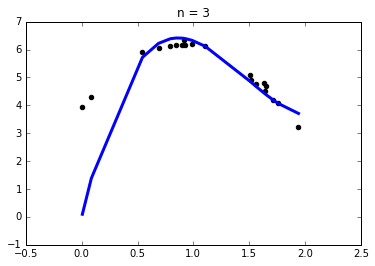

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     106.4
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.59e-11
Time:                        22:16:47   Log-Likelihood:                -28.433
No. Observations:                  20   AIC:                             64.87
Df Residuals:                      16   BIC:                             68.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            30.5330      7.985      3.824      0.0

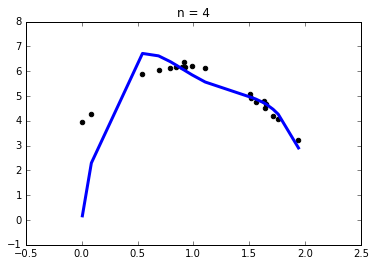

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     104.5
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           4.12e-11
Time:                        22:16:47   Log-Likelihood:                -25.820
No. Observations:                  20   AIC:                             61.64
Df Residuals:                      15   BIC:                             66.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            54.5878     13.473      4.051      0.0

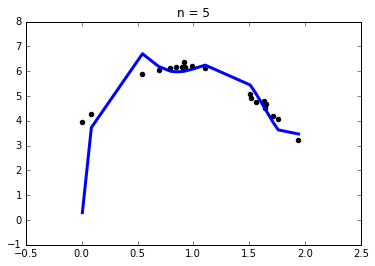

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     97.14
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.35e-10
Time:                        22:16:47   Log-Likelihood:                -24.084
No. Observations:                  20   AIC:                             60.17
Df Residuals:                      14   BIC:                             66.14
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            71.7302     16.560      4.332      0.0

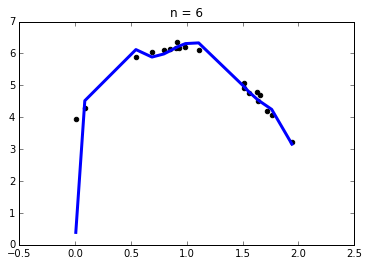

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     79.89
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           1.15e-09
Time:                        22:16:47   Log-Likelihood:                -23.764
No. Observations:                  20   AIC:                             61.53
Df Residuals:                      13   BIC:                             68.50
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            79.7376     20.923      3.811      0.0

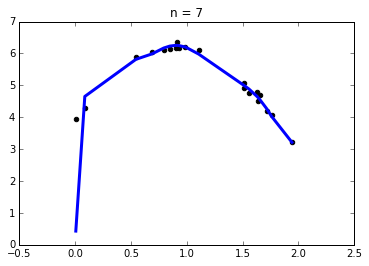

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     65.85
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           9.68e-09
Time:                        22:16:47   Log-Likelihood:                -23.565
No. Observations:                  20   AIC:                             63.13
Df Residuals:                      12   BIC:                             71.10
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            94.6165     37.192      2.544      0.0

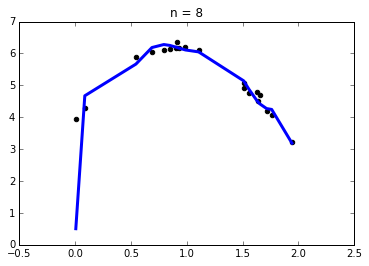

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     67.20
Date:                Thu, 04 Aug 2016   Prob (F-statistic):           2.50e-08
Time:                        22:16:48   Log-Likelihood:                -21.360
No. Observations:                  20   AIC:                             60.72
Df Residuals:                      11   BIC:                             69.68
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           223.4043     85.565      2.611      0.0

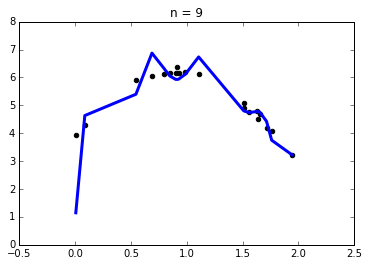

In [8]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

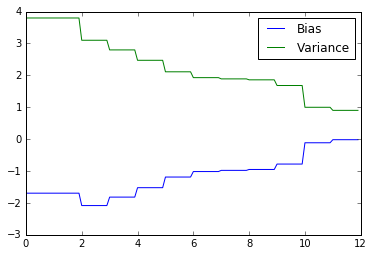

In [9]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


In [ ]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object

    # Compute the errors

    # Plot outputs


# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

In [ ]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    pass
    # Fit a polynomial of degree i to the data
    
    # Compute the errors

    # Plot outputs


### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.